<a href="https://colab.research.google.com/github/LAHROURI/Brain_Tumor_Detection/blob/main/Braint_Tumor_Detection(Version_Finale).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Tools

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow numpy matplotlib scikit-image opencv-python streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 118.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00


# Load Dataset & visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from skimage import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/archive/kaggle_3m

/content/drive/.shortcut-targets-by-id/1PA9XT6AmVKiRmnFLs8kHHJiW0rCwSd5a/archive/kaggle_3m


In [ ]:
brain_df = pd.read_csv('/content/drive/MyDrive/archive/kaggle_3m/data_mask.csv')

In [ ]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [ ]:
brain_df.head()

patient_id                                         image_path  \
0  TCGA_CS_5395_19981004  TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1  TCGA_CS_5395_19981004  TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2  TCGA_CS_5395_19981004  TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3  TCGA_CS_5395_19981004  TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4  TCGA_CS_5395_19981004  TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   

                                           mask_path  mask  
0  TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...     0  
1  TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...     0  
2  TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...     0  
3  TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...     0  
4  TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...     0

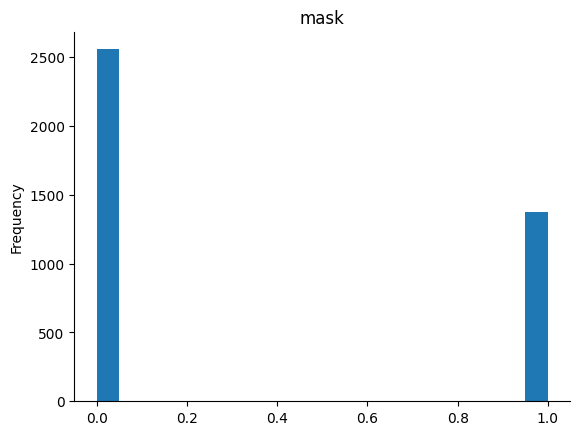

In [ ]:
# @title masks

from matplotlib import pyplot as plt
brain_df['mask'].plot(kind='hist', bins=20, title='mask')
plt.gca().spines[['top', 'right',]].set_visible(False)

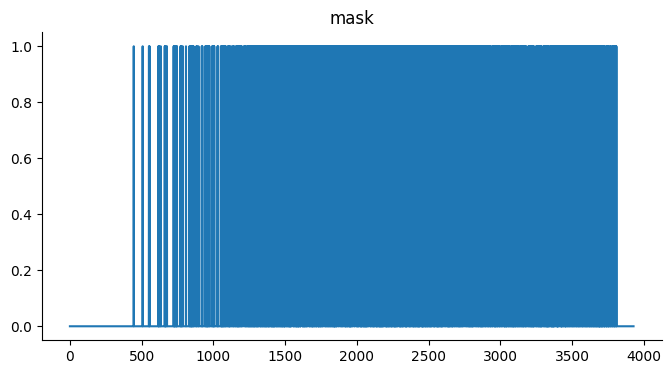

In [ ]:
# @title mask

from matplotlib import pyplot as plt
brain_df['mask'].plot(kind='line', figsize=(8, 4), title='mask')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
brain_df.mask_path[1] # Path to the brain MRI image

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'

In [ ]:
brain_df.image_path[1] # Path to the segmentation mask

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif'

In [ ]:
brain_df['mask'].value_counts().index

Index([0, 1], dtype='int64', name='mask')

In [ ]:
brain_df['mask'].value_counts()

mask
0    2556
1    1373
Name: count, dtype: int64

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

mask_counts = brain_df['mask'].value_counts()
x_vals = mask_counts.index.astype(str)
y_vals = mask_counts.values

colors = px.colors.sequential.Viridis[:len(x_vals)]


fig = go.Figure(data=[
    go.Bar(x=x_vals,y=y_vals,text=y_vals,textposition='auto', marker=dict(color=colors,line=dict(color='blue', width=1.5)))])


fig.update_layout(
    title='Distribution des Masques dans le Dataset Cérébral',
    xaxis_title='Catégorie de Masque',
    yaxis_title='Nombre d’occurrences',
    template='plotly_white',
    font=dict(size=14)
)

fig.show()

In [ ]:
brain_df.image_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: image_path, Length: 3929, dtype: object

In [ ]:
brain_df.mask_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: mask_path, Length: 3929, dtype: object

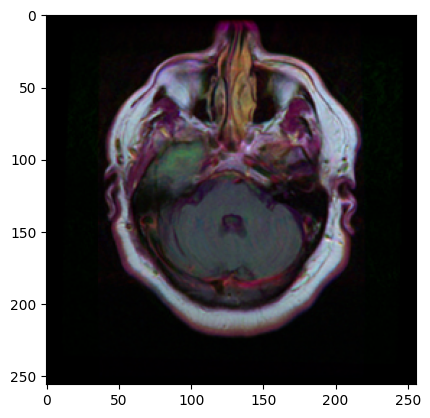

In [ ]:
plt.imshow(cv2.imread(brain_df.image_path[623]))

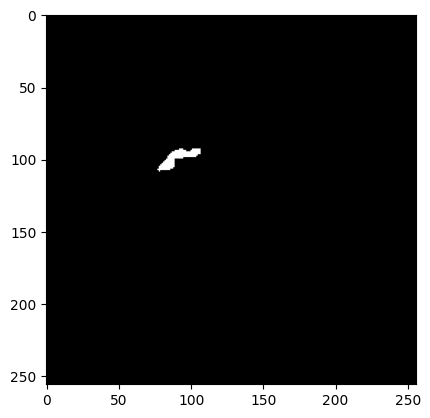

In [ ]:
plt.imshow(cv2.imread(brain_df.mask_path[623]))

In [ ]:
print(cv2.imread(brain_df.mask_path[623]).max())
print(cv2.imread(brain_df.mask_path[623]).min())

255
0


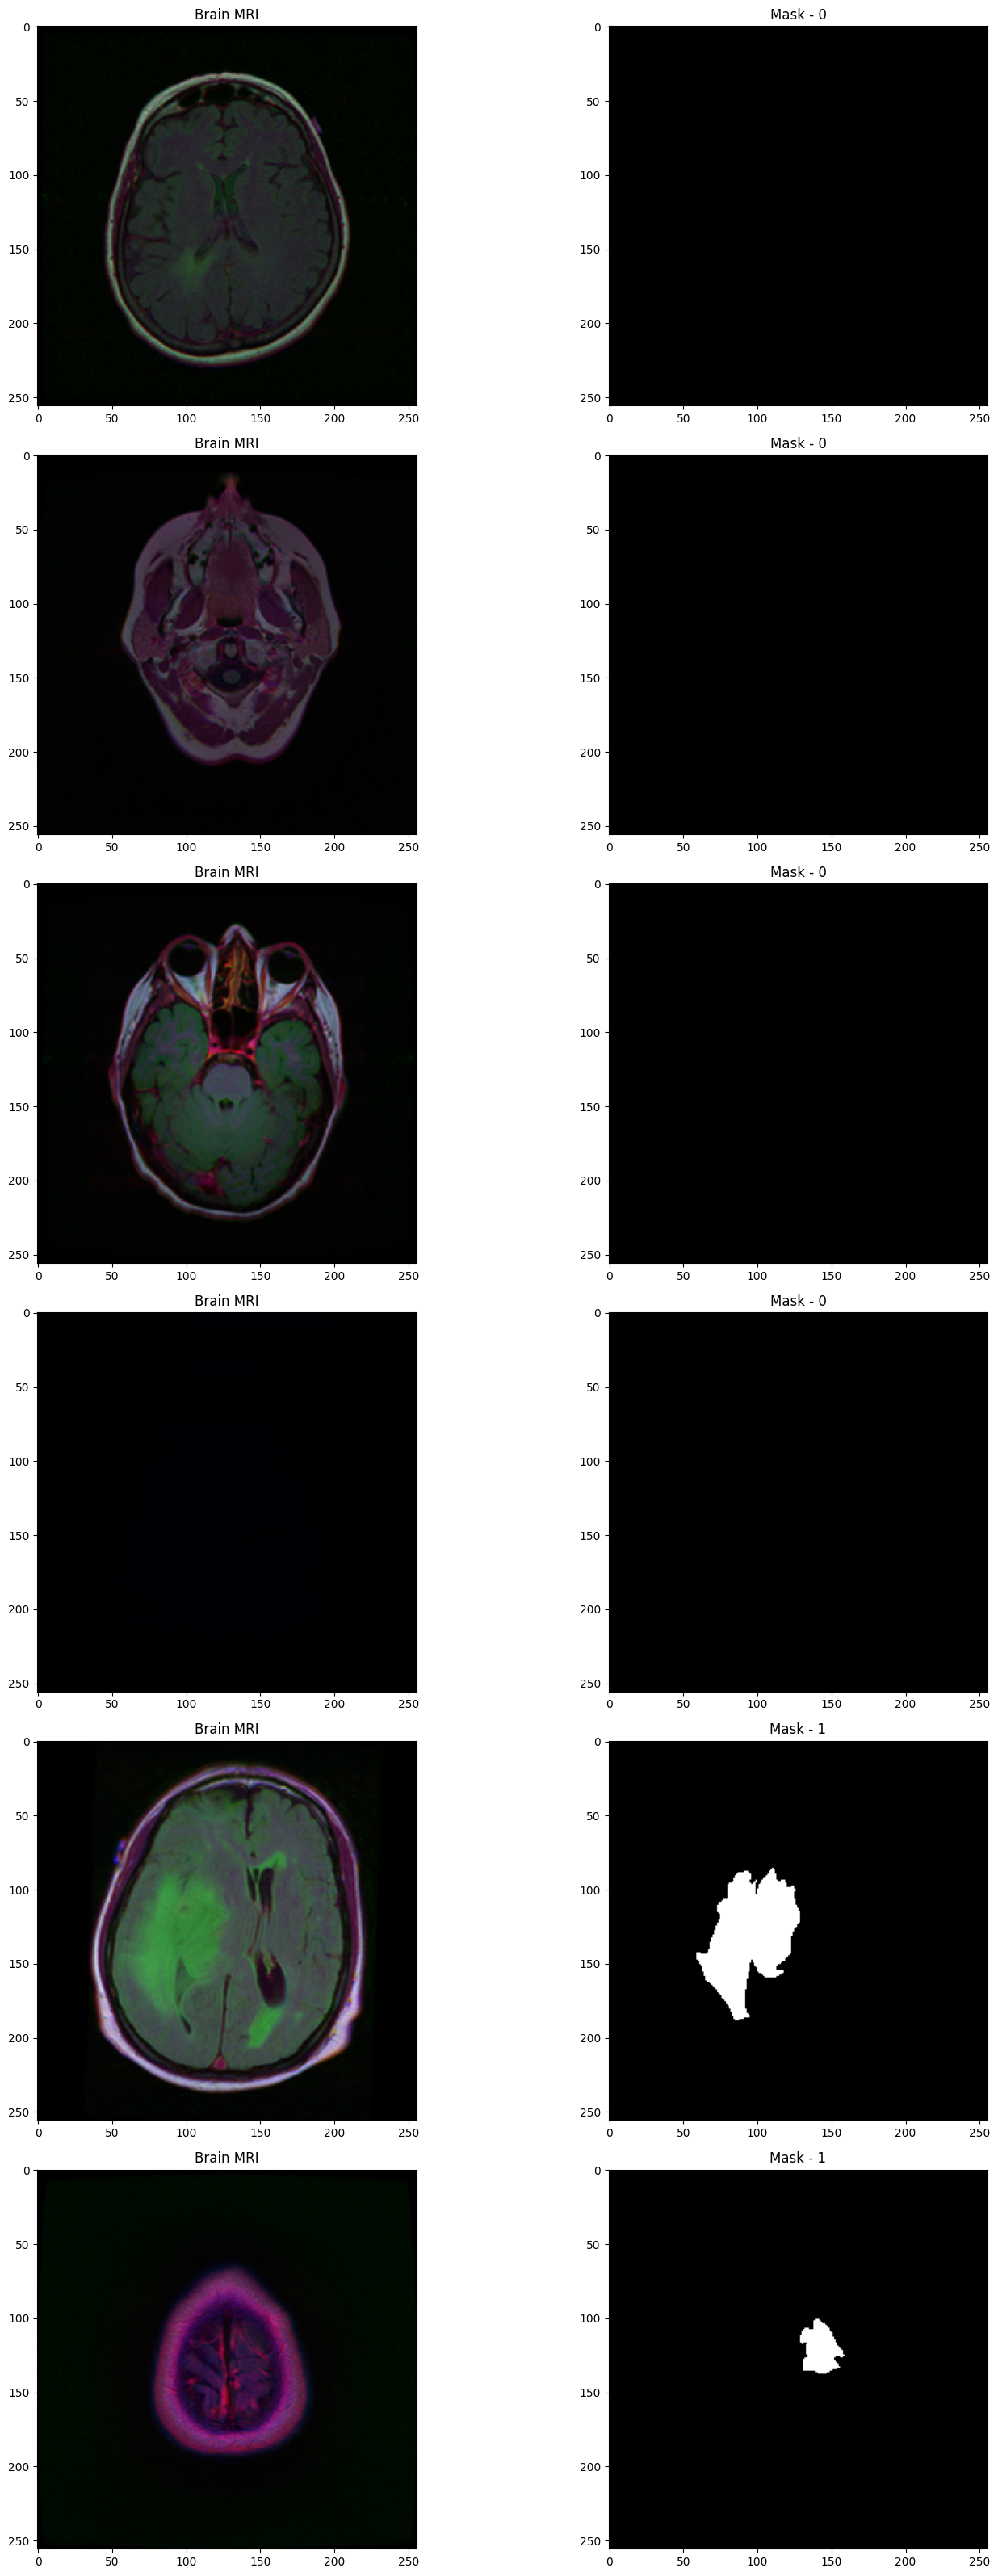

In [ ]:
# Basic visualizations: Visualize the images (MRI and Mask) in the dataset separately
import random
fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df)) # select a random index
  axs[count][0].title.set_text("Brain MRI")
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i])) # show MRI
  axs[count][1].title.set_text("Mask - " + str(brain_df['mask'][i])) # plot title on the mask (0 or 1)
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i])) # Show corresponding mask
  count += 1

fig.tight_layout()

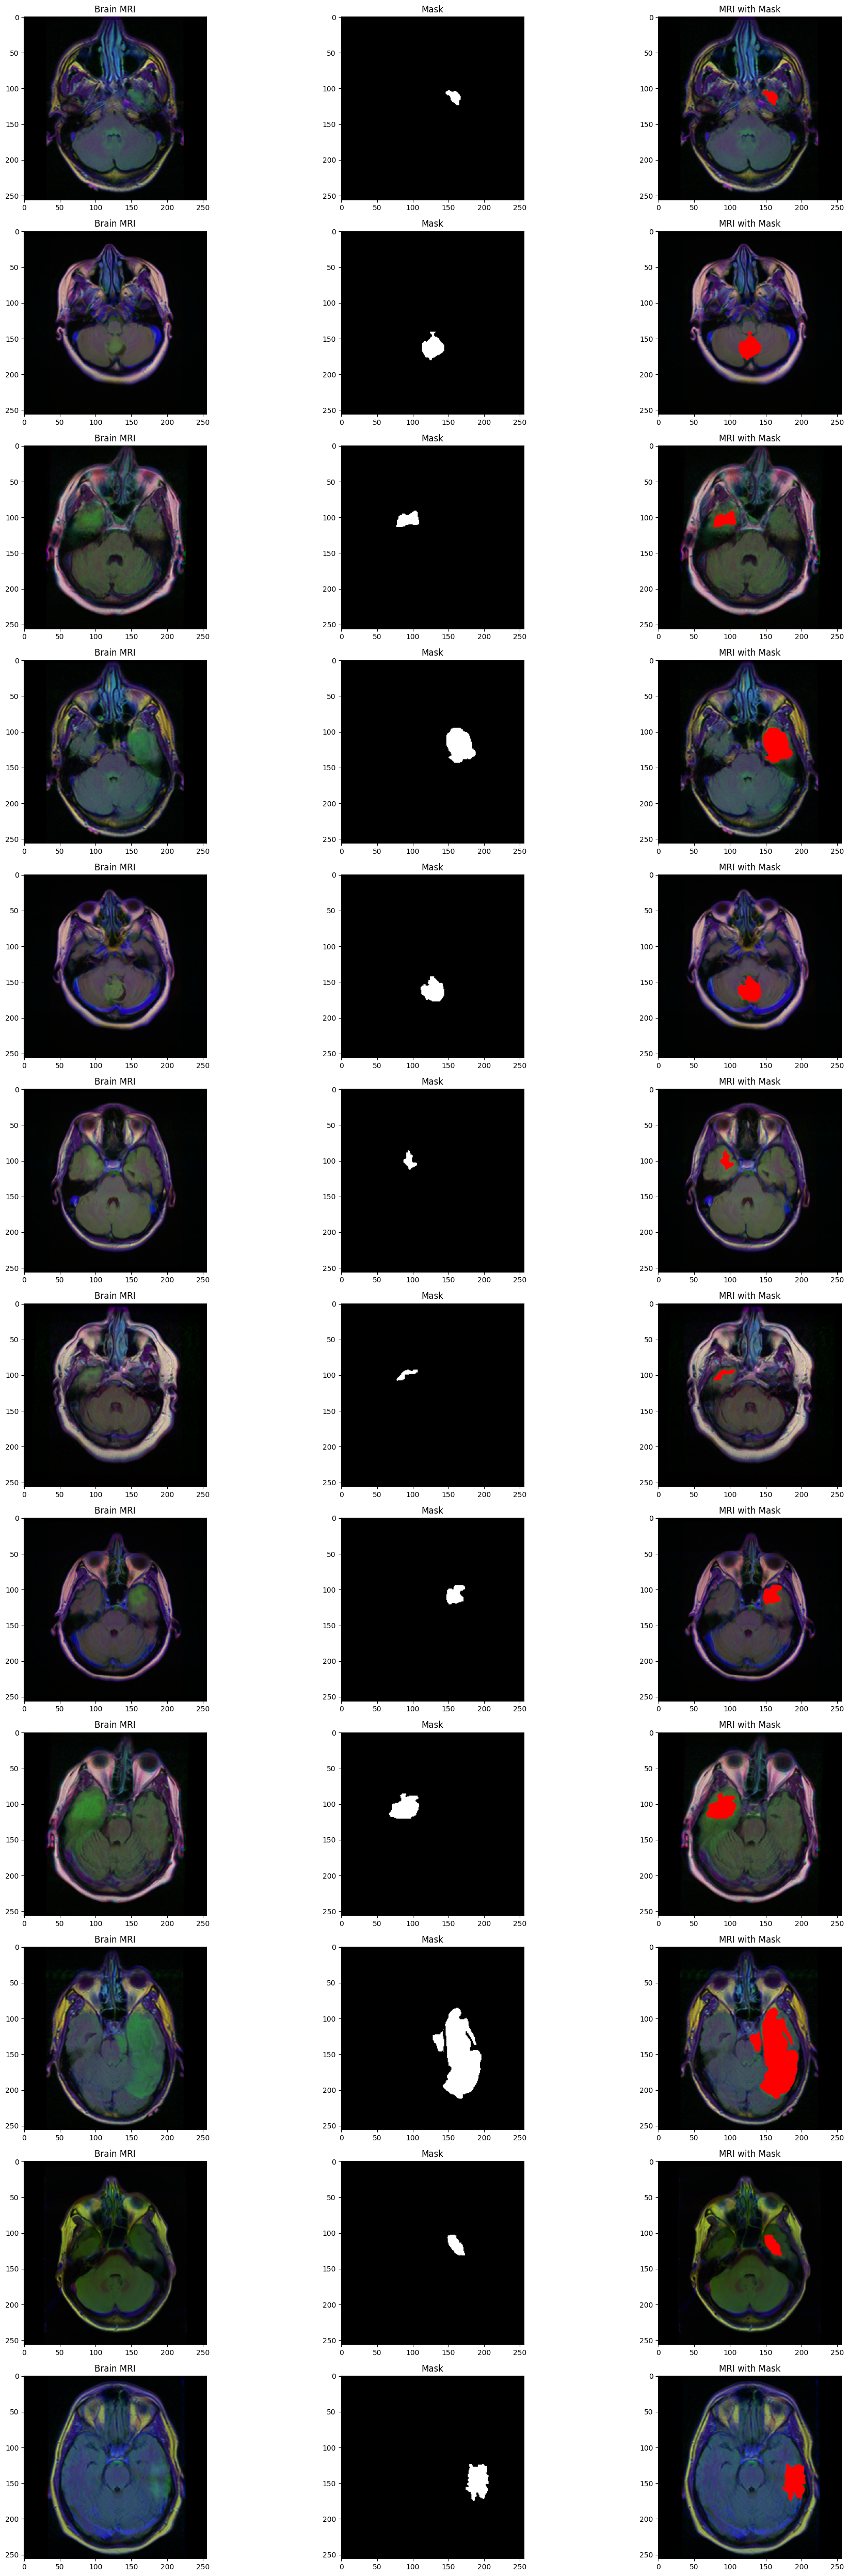

In [ ]:
# Advanced Visualization: visualize the MRI scans along with their mask on one image
count = 0
fig, axs = plt.subplots(12,3, figsize=(20,50))
for i in range(len(brain_df)):
  if brain_df['mask'][i] == 1 and count < 12:
  # read the images
    img = io.imread(brain_df.image_path[i])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)

    # obtain the mask for the image
    mask = io.imread(brain_df.mask_path[i])
    axs[count][1].title.set_text("Mask")
    axs[count][1].imshow(mask, cmap = 'gray')

    # replace the values in the image with red color (255,0,0) if any mask pixel in the mask was = 255
    img[mask == 255] = (255,0,0)
    axs[count][2].title.set_text("MRI with Mask")
    axs[count][2].imshow(img)
    count += 1

fig.tight_layout()

# MOBILENET CLASSIFIER MODEL TO DETECT IF TUMOR EXISTS OR NOT

**PREPROCESSING**

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_path = '/content/drive/MyDrive/archive/kaggle_3m'

brain_df = pd.read_csv(os.path.join(data_path, 'data_mask.csv'))

image_paths = [os.path.join(data_path, p) for p in brain_df['image_path']]
labels = brain_df['mask'].values  # Assuming 'mask' column contains the labels (0 or 1)

unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)


def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalisation des pixels
    return img

# Générateurs pour l'entraînement et le test
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()

def data_generator(image_paths, labels, batch_size=32, datagen=None):
    while True:
        indices = np.arange(len(image_paths))
        np.random.shuffle(indices)
        for start in range(0, len(image_paths), batch_size):
            end = min(start + batch_size, len(image_paths))
            batch_indices = indices[start:end]
            batch_images = np.array([load_and_preprocess_image(image_paths[i]) for i in batch_indices])
            batch_labels = labels[batch_indices]

            if datagen is not None:
                # The fix: remove .next() and directly yield the output of datagen.flow
                augmented = datagen.flow(batch_images, batch_labels, batch_size=batch_size, shuffle=False)
                yield next(augmented)


            else:
                yield batch_images, batch_labels

train_gen = data_generator(X_train, y_train, batch_size=32, datagen=train_datagen)
test_gen = data_generator(X_test, y_test, batch_size=32, datagen=test_datagen)

{np.int64(0): np.int64(2556), np.int64(1): np.int64(1373)}


**MOBILENET CLASSIFIER MODEL**

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model,load_model

# Charger MobileNet
basemodel = MobileNet(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))


# Geler les couches
for layer in basemodel.layers:
    layer.trainable = False

# Classification head
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4, 4))(headmodel)  # Revert back to original pool_size
headmodel = Flatten(name='flatten')(headmodel)
headmodel = Dense(256, activation="relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation="relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation='softmax')(headmodel)

# Créer le modèle complet
model = Model(inputs=basemodel.input, outputs=headmodel)

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
epochs = 5
batch_size = 32

history = model.fit(train_gen,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs,
                    validation_data=test_gen,
                    validation_steps=len(X_test) // batch_size)

# Évaluer le modèle
loss, accuracy = model.evaluate(test_gen, steps=len(X_test) // batch_size)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Sauvegarder les poids du modèle
save_dir = "/content/drive/MyDrive/models/"
os.makedirs(save_dir, exist_ok=True)
model.save_weights("/content/drive/MyDrive/models/classifier-mobilenet-weights.weights.h5")
model.save("/content/drive/MyDrive/models/classifier_model.h5")


<ipython-input-14-34cc7ad7a371>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  basemodel = MobileNet(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_279']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


98/98 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.7084 - loss: 0.6640 - val_accuracy: 0.7732 - val_loss: 0.4106
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.8107 - loss: 0.3940 - val_accuracy: 0.8103 - val_loss: 0.3809
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.8299 - loss: 0.3536 - val_accuracy: 0.8660 - val_loss: 0.2931
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.8395 - loss: 0.3358 - val_accuracy: 0.8793 - val_loss: 0.2697
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.8403 - loss: 0.3151 - val_accuracy: 0.8515 - val_loss: 0.3061
24/24 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8441 - loss: 0.3059
Test Loss: 0.2954806387424469
Test Accuracy: 0.8527851700782776


**Fine-tuning of the latest layers of MobileNet**

In [ ]:
# Débloquer les 20 dernières couches de MobileNet
for layer in basemodel.layers[-20:]:
    layer.trainable = True

# Recompiler le modèle après avoir modifié la trainabilité
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ré-entraîner
fine_tune_epochs = 5
total_epochs = epochs + fine_tune_epochs

history_finetune = model.fit(train_gen,
                             steps_per_epoch=len(X_train) // batch_size,
                             epochs=total_epochs,
                             initial_epoch=history.epoch[-1],  # Reprend après les 5 premières époques
                             validation_data=test_gen,
                             validation_steps=len(X_test) // batch_size)

Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.7955 - loss: 0.4144 - val_accuracy: 0.8674 - val_loss: 0.2794
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.8759 - loss: 0.2873 - val_accuracy: 0.8647 - val_loss: 0.4151
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.8989 - loss: 0.2543 - val_accuracy: 0.7958 - val_loss: 0.7188
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.9043 - loss: 0.2322 - val_accuracy: 0.8899 - val_loss: 0.3093
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 0.9114 - loss: 0.2097 - val_accuracy: 0.8873 - val_loss: 0.2977
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.9194 - loss: 0.2230 - val_accuracy: 0.8685 - val_loss: 0.3120


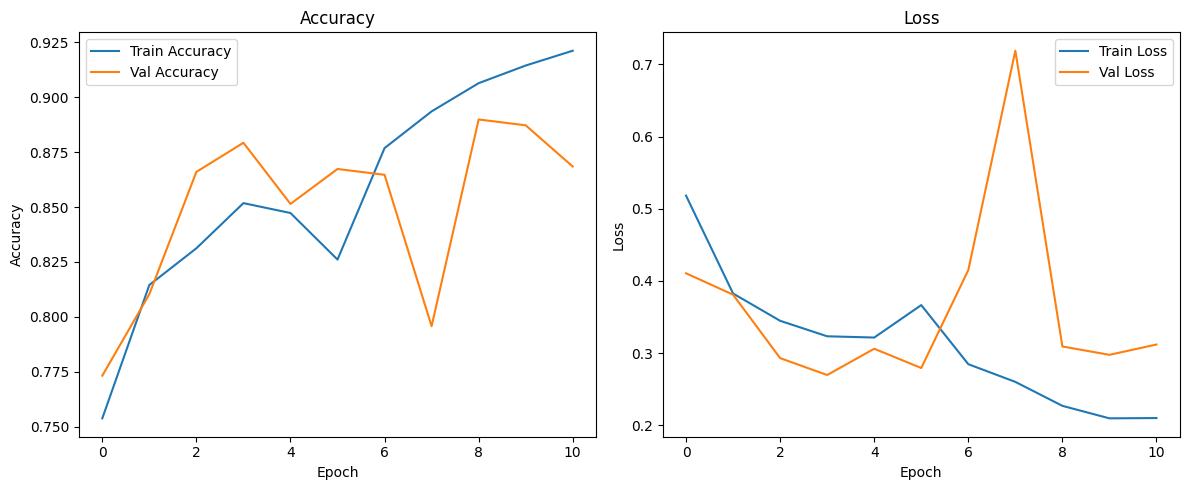

In [ ]:
import matplotlib.pyplot as plt

# Fusionner les deux historiques
def combine_history(original, finetune):
    combined = {}
    for key in original.history.keys():
        combined[key] = original.history[key] + finetune.history[key]
    return combined

combined_history = combine_history(history, history_finetune)

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(combined_history['accuracy'], label='Train Accuracy')
plt.plot(combined_history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(combined_history['loss'], label='Train Loss')
plt.plot(combined_history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_279']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


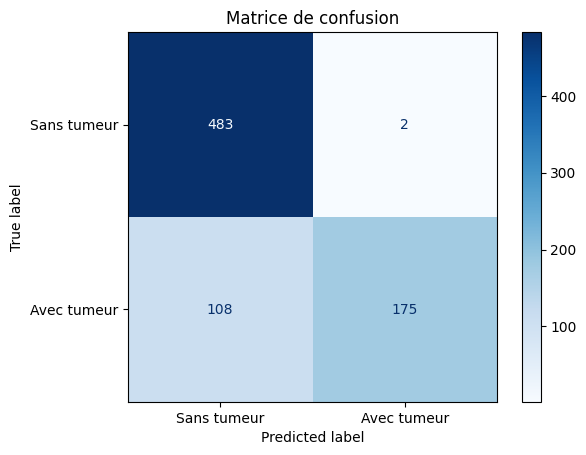

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédire les classes
y_pred = []
y_true = []

for i in range(len(X_test) // batch_size):
    X_batch, y_batch = next(test_gen)
    preds = model.predict(X_batch)
    y_pred += list(np.argmax(preds, axis=1))
    y_true += list(y_batch)

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sans tumeur", "Avec tumeur"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

# Segmentation with MobileNetV2 U_NET

**PREPROCESSING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


MobileNetV2 uses 224x224 as the standard input size to reduce computational cost and enable faster inference, especially on mobile devices.

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, UpSampling2D, Concatenate, Input
from tensorflow.keras.models import Model
import pandas as pd


# PARAMÈTRES
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Taille plus petite pour MobileNetV2
BATCH_SIZE = 8
EPOCHS = 5

# CHARGEMENT DES DONNÉES
data_path = '/content/drive/MyDrive/archive/kaggle_3m'
brain_df = pd.read_csv(os.path.join(data_path, 'data_mask.csv'))

# Charger une partie seulement pour éviter les crashs
brain_df = brain_df.sample(frac=0.3, random_state=42)  # 30% des données

# The fix: Use 'image_path' instead of 'Image' for image paths
image_paths = [os.path.join(data_path, p) for p in brain_df['image_path']]
# The fix: Use 'mask_path' instead of 'Mask' for mask paths
mask_paths = [os.path.join(data_path, p) for p in brain_df['mask_path']]

X_train, X_test, y_train, y_test = train_test_split(image_paths, mask_paths, test_size=0.2, random_state=42)

In [ ]:
def load_image_and_mask(image_path, mask_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) / 255.0

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT)) / 255.0
    mask = np.expand_dims(mask, axis=-1)
    return img, mask
def data_generator(image_paths, mask_paths, batch_size):
    while True:
        idx = np.arange(len(image_paths))
        np.random.shuffle(idx)
        for i in range(0, len(image_paths), batch_size):
            batch_idx = idx[i:i+batch_size]
            imgs, masks = [], []
            for j in batch_idx:
                img, mask = load_image_and_mask(image_paths[j], mask_paths[j])
                imgs.append(img)
                masks.append(mask)
            yield np.array(imgs), np.array(masks)

train_gen = data_generator(X_train, y_train, BATCH_SIZE)
test_gen = data_generator(X_test, y_test, BATCH_SIZE)

**MobileNetV2 U-Net MODELE FOR SEGMENTATION**

In [ ]:
# MobileNetV2 U-Net
def mobilenetv2_unet(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

    # Couches de sortie qu'on veut utiliser
    layer_names = ["block_1_expand_relu", "block_3_expand_relu", "block_6_expand_relu", "block_13_expand_relu", "block_16_project"]
    layers = [base_model.get_layer(name).output for name in layer_names]

    # Modèle tronqué (encoder)
    encoder = Model(inputs=base_model.input, outputs=layers)
    encoder.trainable = False

    inputs = Input(shape=input_shape)
    skips = encoder(inputs)
    x = skips[-1]

    # début du décodeur
    # First upsampling block
    x = UpSampling2D((2, 2))(x) # Upsample from (7x7) to (14x14)
    x = Concatenate()([x, skips[3]])
    x = Conv2D(256, 3, activation='relu', padding='same')(x)
    x = Conv2D(256, 3, activation='relu', padding='same')(x)

    # Second upsampling block
    x = UpSampling2D((2, 2))(x) # Upsample from (14x14) to (28x28)
    x = Concatenate()([x, skips[2]])
    x = Conv2D(128, 3, activation='relu', padding='same')(x)
    x = Conv2D(128, 3, activation='relu', padding='same')(x)

    # Third upsampling block
    x = UpSampling2D((2, 2))(x) # Upsample from (28x28) to (56x56)
    x = Concatenate()([x, skips[1]])
    x = Conv2D(64, 3, activation='relu', padding='same')(x)
    x = Conv2D(64, 3, activation='relu', padding='same')(x)

    # Fourth upsampling block
    x = UpSampling2D((2, 2))(x) # Upsample from (56x56) to (112x112)
    x = Concatenate()([x, skips[0]])
    x = Conv2D(32, 3, activation='relu', padding='same')(x)
    x = Conv2D(32, 3, activation='relu', padding='same')(x)

    # Fifth upsampling block
    x = UpSampling2D((2, 2))(x)  # Upsample from (112x112) to (224x224)
    x = Conv2D(16, 3, activation='relu', padding='same')(x)
    x = Conv2D(16, 3, activation='relu', padding='same')(x)

    x = Conv2D(1, 1, activation='sigmoid')(x) # Output layer

    return Model(inputs, x)

model = mobilenetv2_unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_4        │ [(None, 112, 112, │  1,841,984 │ input_layer_5[0]… │
│ (Functional)        │ 96), (None, 56,   │            │                   │
│                     │ 56, 144), (None,  │            │                   │
│                     │ 28, 28, 192),     │            │                   │
│                     │ (None, 14, 14,    │            │                   │
│                     │ 576), (None, 7,   │            │                   │
│                     │ 7, 320)]          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 14, 14,    │          0 │ functional_4[0][… │
│ (UpSampling2D)      │ 320)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 14, 14,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 896)              │            │ functional_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │  2,064,640 │ concatenate[0][0] │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 14, 14,    │    590,080 │ conv2d[0][0]      │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 28, 28,    │          0 │ conv2d_1[0][0]    │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 28, 28,    │          0 │ up_sampling2d_1[… │
│ (Concatenate)       │ 448)              │            │ functional_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │    516,224 │ concatenate_1[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 28, 28,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_2     │ (None, 56, 56,    │          0 │ conv2d_3[0][0]    │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 56, 56,    │          0 │ up_sampling2d_2[… │
│ (Concatenate)       │ 272)              │            │ functional_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │    156,736 │ concatenate_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 56, 56,    │     36,928 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_3     │ (None, 112, 112,  │          0 │ conv2d_5[0][0]    │
│ (UpSampling2D)      │ 64)               │            │                 

 Total params: 5,416,497 (20.66 MB)

 Trainable params: 3,574,513 (13.64 MB)

 Non-trainable params: 1,841,984 (7.03 MB)

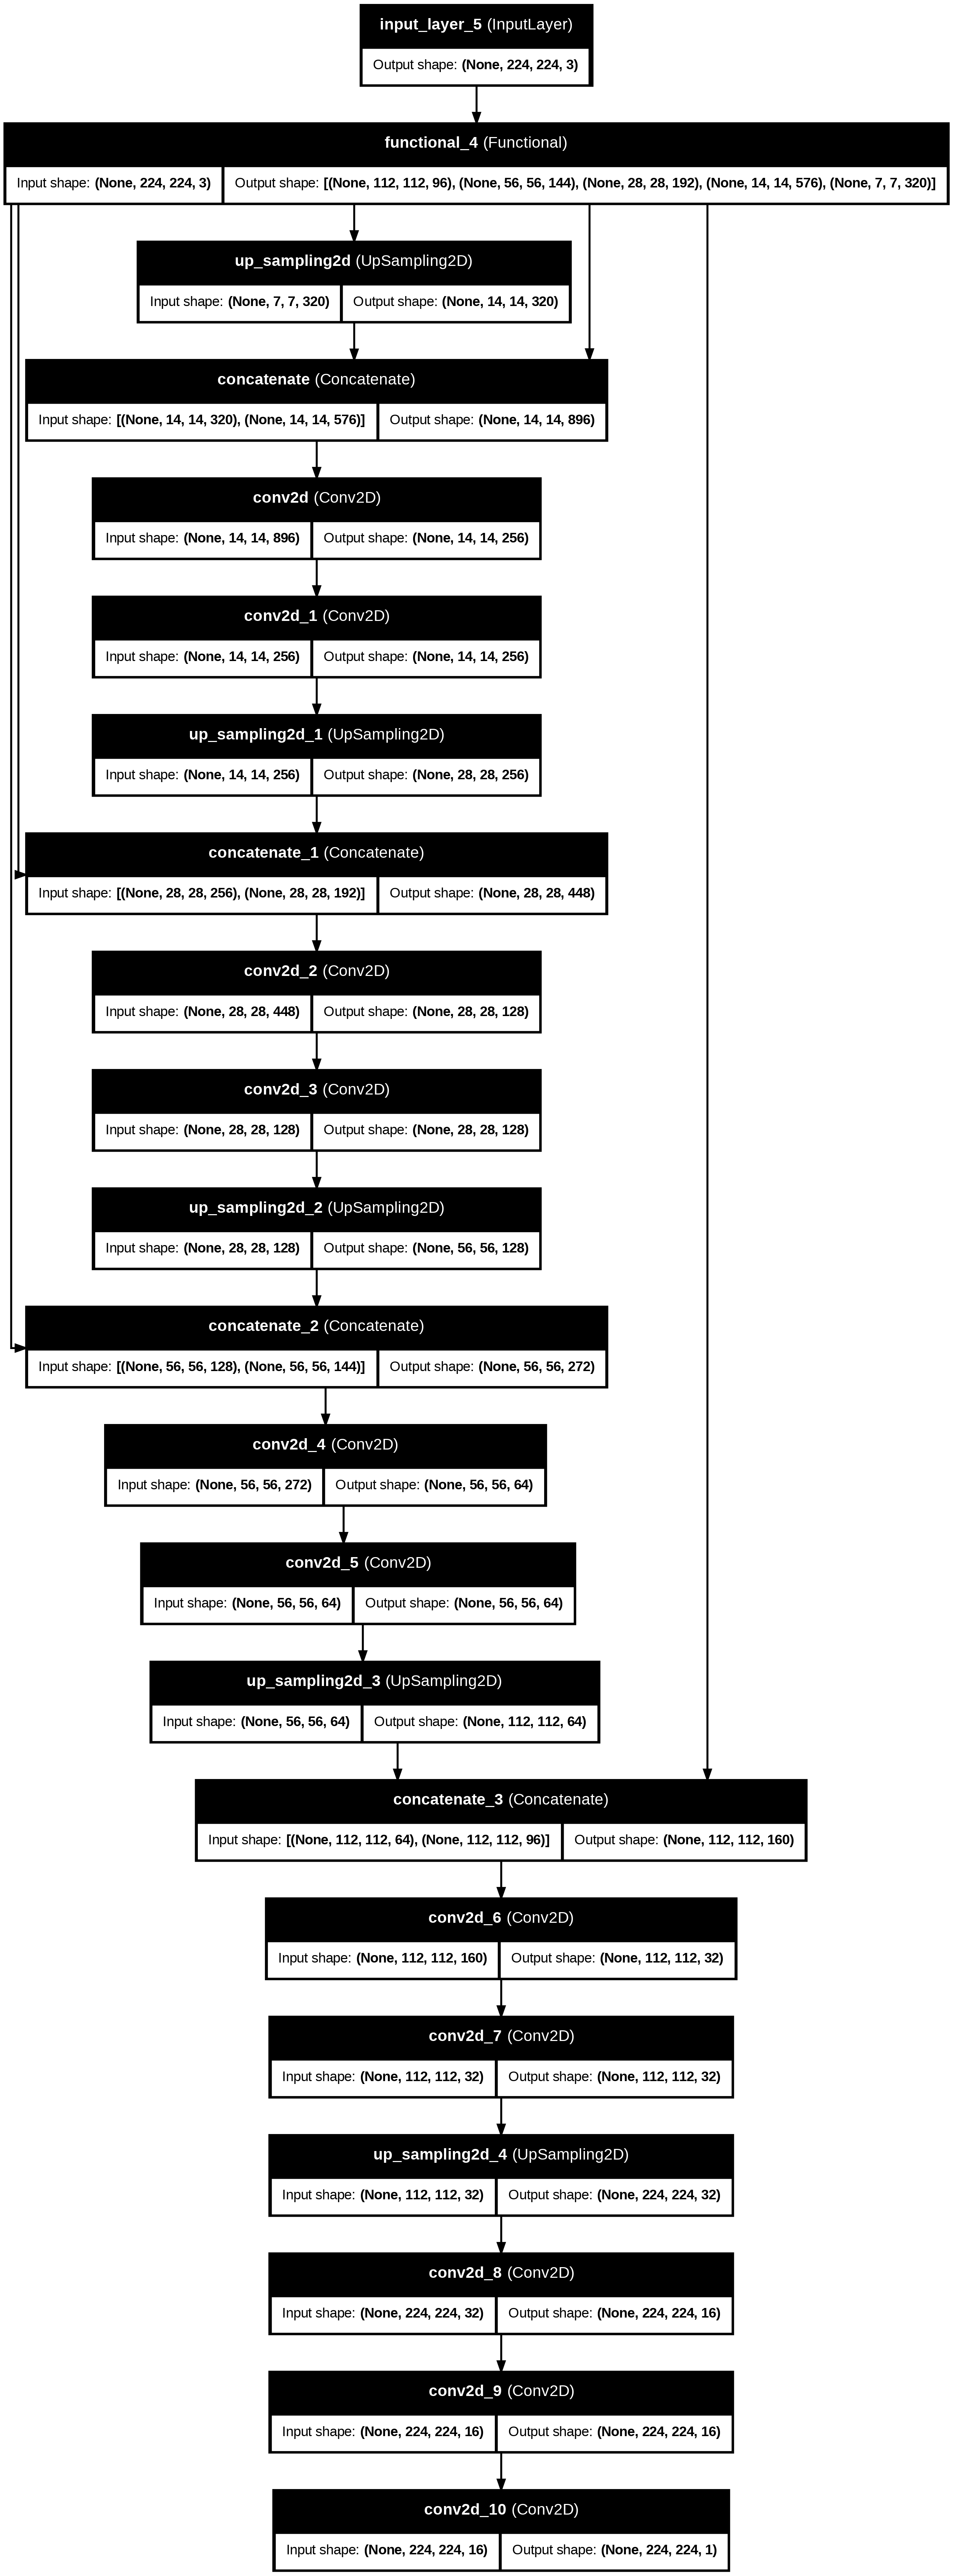

In [ ]:
from tensorflow.keras.utils import plot_model

# The fix: Replace 'model_unet' with 'model'
plot_model(model, to_file='/content/unet_architecture.png', show_shapes=True, show_layer_names=True)

**PREPROCESSING**

In [ ]:
# ENTRAÎNEMENT
steps_per_epoch = len(X_train) // BATCH_SIZE
val_steps = len(X_test) // BATCH_SIZE

history = model.fit(train_gen,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=test_gen,
                    validation_steps=val_steps,
                    epochs=EPOCHS)

# SAUVEGARDE
model.save("/content/drive/MyDrive/models/unet_model.h5")

Epoch 1/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 598s 5s/step - accuracy: 0.9489 - loss: 0.1126 - val_accuracy: 0.9892 - val_loss: 0.0286
Epoch 2/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 542s 5s/step - accuracy: 0.9889 - loss: 0.0319 - val_accuracy: 0.9940 - val_loss: 0.0169
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 545s 5s/step - accuracy: 0.9904 - loss: 0.0279 - val_accuracy: 0.9922 - val_loss: 0.0196
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 540s 5s/step - accuracy: 0.9924 - loss: 0.0205 - val_accuracy: 0.9949 - val_loss: 0.0142
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 561s 5s/step - accuracy: 0.9940 - loss: 0.0146 - val_accuracy: 0.9938 - val_loss: 0.0214


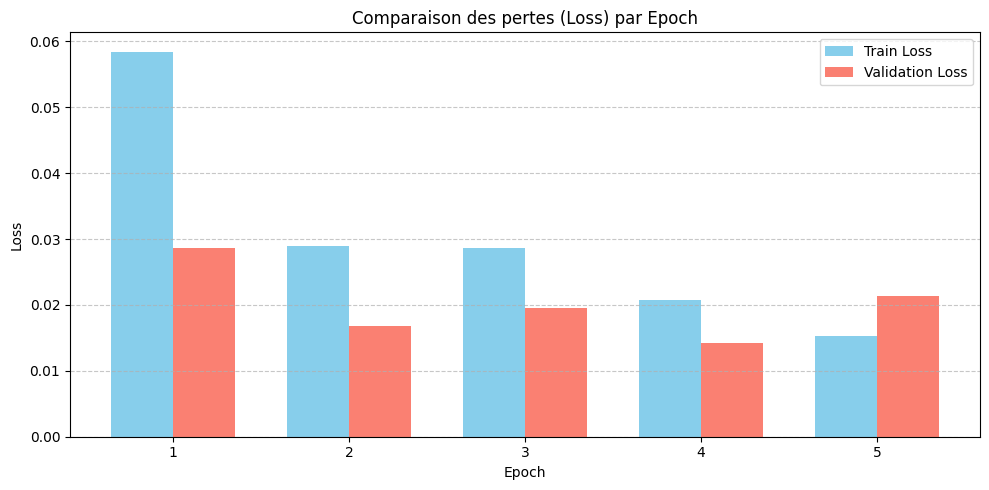

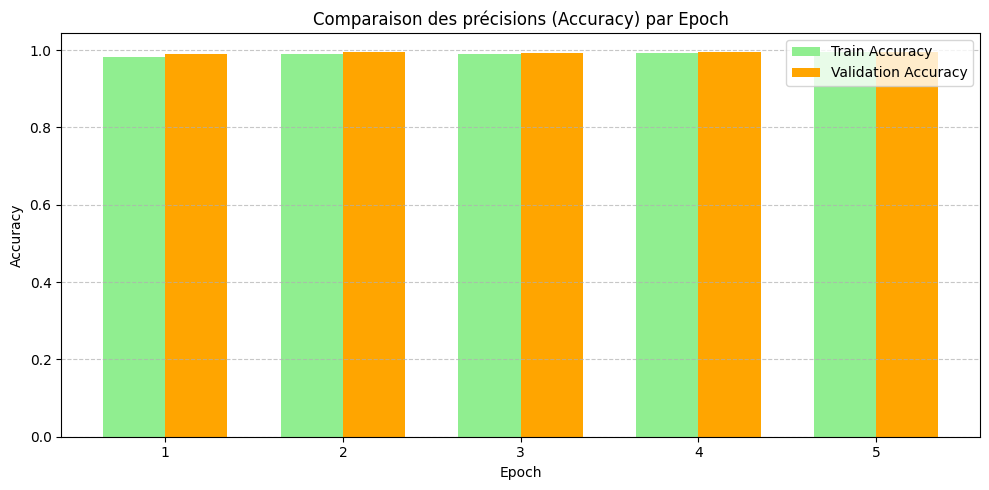

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Récupération des valeurs de loss et accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = np.arange(1, len(train_loss) + 1)
bar_width = 0.35

# === Graphe des pertes ===
plt.figure(figsize=(10, 5))
r1 = epochs - bar_width / 2
r2 = epochs + bar_width / 2

plt.bar(r1, train_loss, width=bar_width, label='Train Loss', color='skyblue')
plt.bar(r2, val_loss, width=bar_width, label='Validation Loss', color='salmon')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparaison des pertes (Loss) par Epoch')
plt.xticks(epochs)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === Graphe des précisions ===
plt.figure(figsize=(10, 5))
plt.bar(r1, train_acc, width=bar_width, label='Train Accuracy', color='lightgreen')
plt.bar(r2, val_acc, width=bar_width, label='Validation Accuracy', color='orange')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Comparaison des précisions (Accuracy) par Epoch')
plt.xticks(epochs)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Displaying segmentation**

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


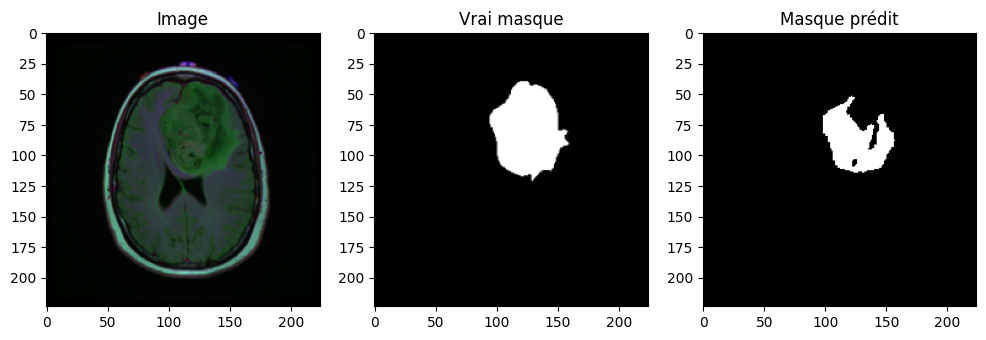

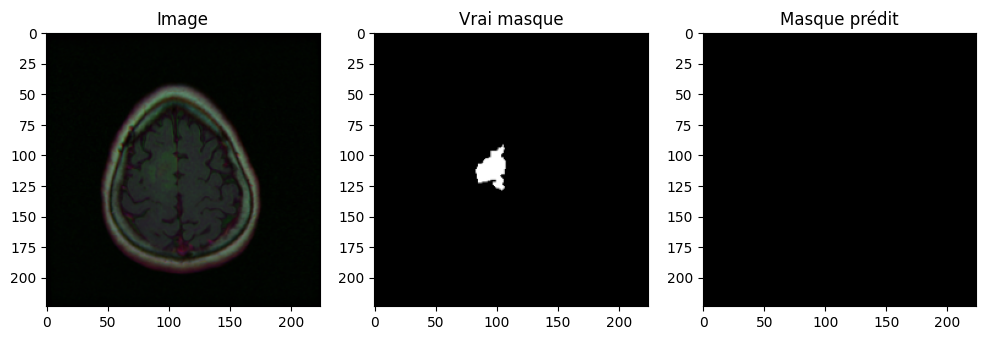

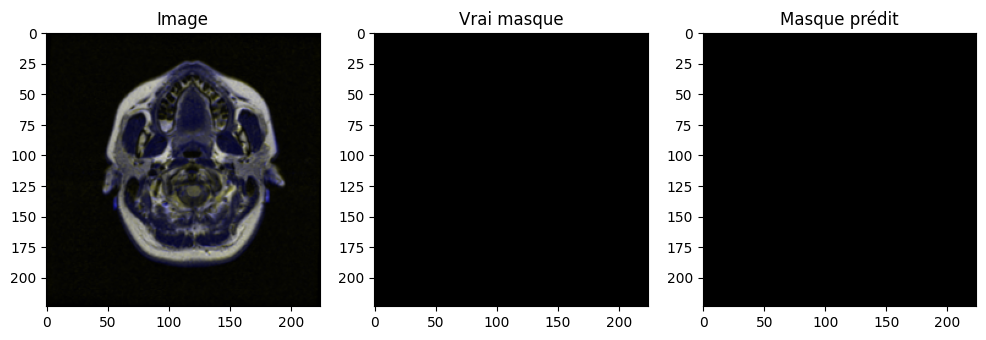

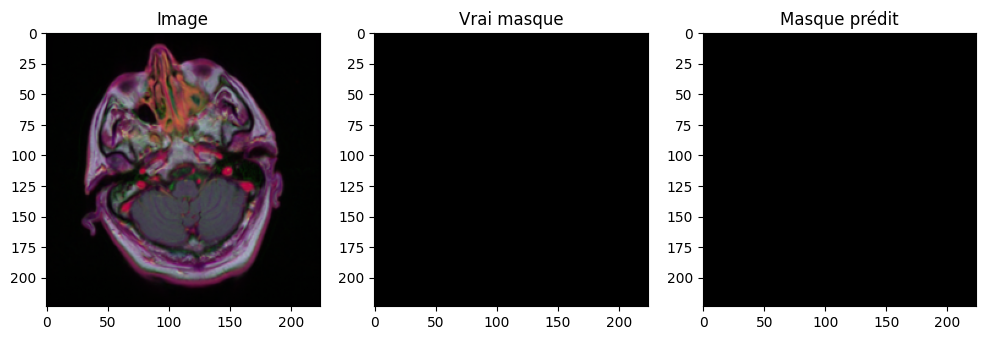

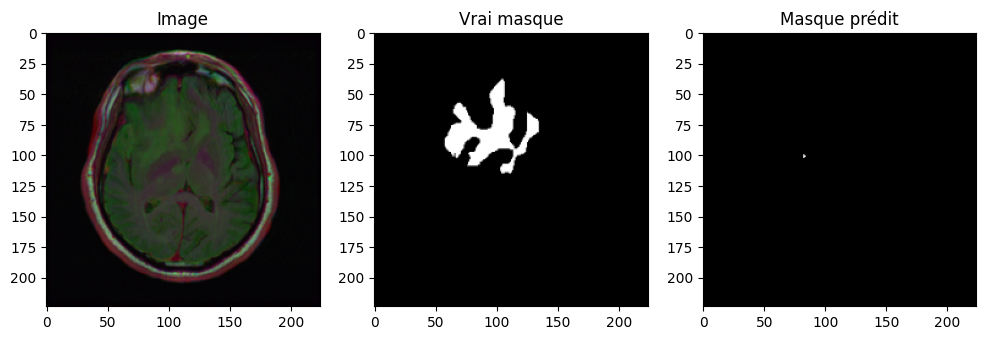

In [ ]:
def show_predictions(model, X, y_true, n=5):
    preds = model.predict(X[:n])
    for i in range(n):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(X[i])
        plt.title("Image")

        plt.subplot(1, 3, 2)
        plt.imshow(y_true[i].squeeze(), cmap='gray')
        plt.title("Vrai masque")

        plt.subplot(1, 3, 3)
        plt.imshow(preds[i].squeeze() > 0.5, cmap='gray')
        plt.title("Masque prédit")

        plt.show()

# Prend un batch depuis le générateur de test
X_batch, y_batch = next(test_gen)

# Affiche les prédictions
# The fix: Call show_predictions with 'model' instead of 'model_unet'
show_predictions(model, X_batch, y_batch, n=5)

29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9929 - loss: 0.0227
Accuracy =  99.3402898311615 %


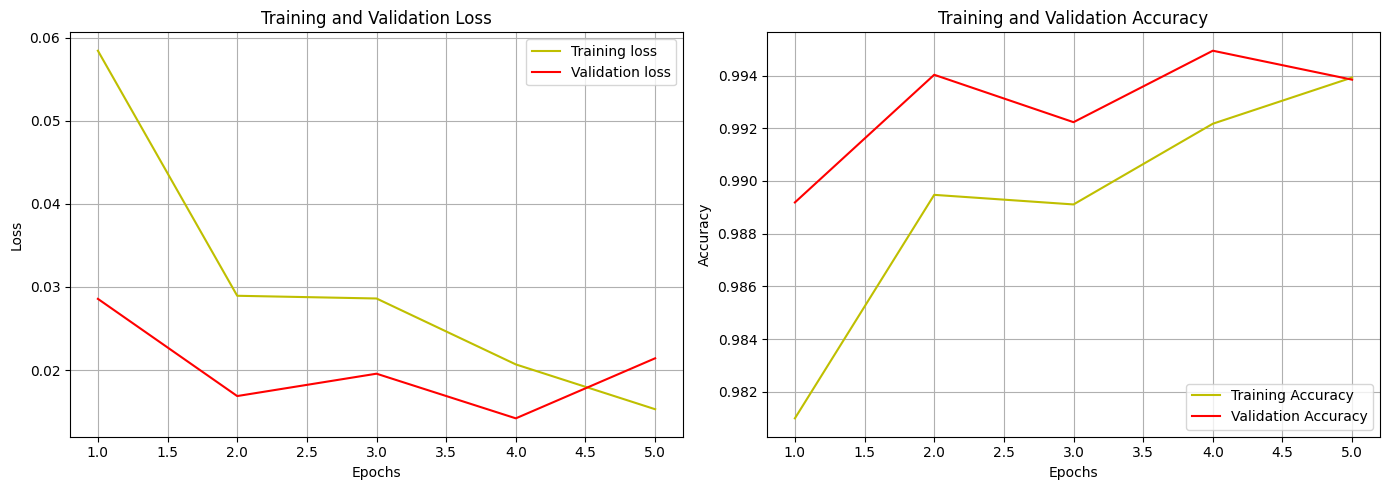

In [ ]:
import matplotlib.pyplot as plt

# Évaluer le modèle
loss, acc = model.evaluate(test_gen, steps=len(X_test) // BATCH_SIZE)
print("Accuracy = ", acc * 100.0, "%")

# Récupérer l'historique
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 5))

# Courbe de la perte
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Courbe de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Afficher les courbes
plt.tight_layout()
plt.grid(True)
plt.show()

**the Dice Coefficient curves**

Combine Model Compilation and Training:

In [ ]:
import tensorflow.keras.backend as K
import tensorflow as tf

def dice_coeff(y_true, y_pred):
    y_true_f = K.flatten(tf.cast(y_true, tf.float32))  # Cast y_true to float32
    y_pred_f = K.flatten(tf.cast(y_pred, tf.float32))  # Cast y_pred to float32
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

def iou(y_true, y_pred):
    y_true_f = K.flatten(tf.cast(y_true, tf.float32))  # Cast y_true to float32
    y_pred_f = K.flatten(tf.cast(y_pred, tf.float32))  # Cast y_pred to float32
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
    return (intersection + 1) / (union + 1)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', dice_coeff, iou])

# ENTRAINEMENT
steps_per_epoch = len(X_train) // BATCH_SIZE
val_steps = len(X_test) // BATCH_SIZE

history = model.fit(train_gen,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=test_gen,
                    validation_steps=val_steps,
                    epochs=EPOCHS)

Epoch 1/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 566s 5s/step - accuracy: 0.9931 - dice_coeff: 0.5431 - iou: 0.3974 - loss: 0.0179 - val_accuracy: 0.9928 - val_dice_coeff: 0.4343 - val_iou: 0.3016 - val_loss: 0.0230
Epoch 2/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 561s 5s/step - accuracy: 0.9945 - dice_coeff: 0.5366 - iou: 0.4034 - loss: 0.0150 - val_accuracy: 0.9949 - val_dice_coeff: 0.4219 - val_iou: 0.2884 - val_loss: 0.0143
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 544s 5s/step - accuracy: 0.9951 - dice_coeff: 0.6080 - iou: 0.4643 - loss: 0.0114 - val_accuracy: 0.9956 - val_dice_coeff: 0.7163 - val_iou: 0.5928 - val_loss: 0.0100
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 560s 5s/step - accuracy: 0.9960 - dice_coeff: 0.6767 - iou: 0.5463 - loss: 0.0089 - val_accuracy: 0.9950 - val_dice_coeff: 0.6407 - val_iou: 0.4977 - val_loss: 0.0115
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 564s 5s/step - accuracy: 0.9958 - dice_coeff: 0.7149 - iou: 0.5751 - loss: 0.0093 - val_accuracy: 0.9952 - val_dice_coeff: 0.7027 - val_i

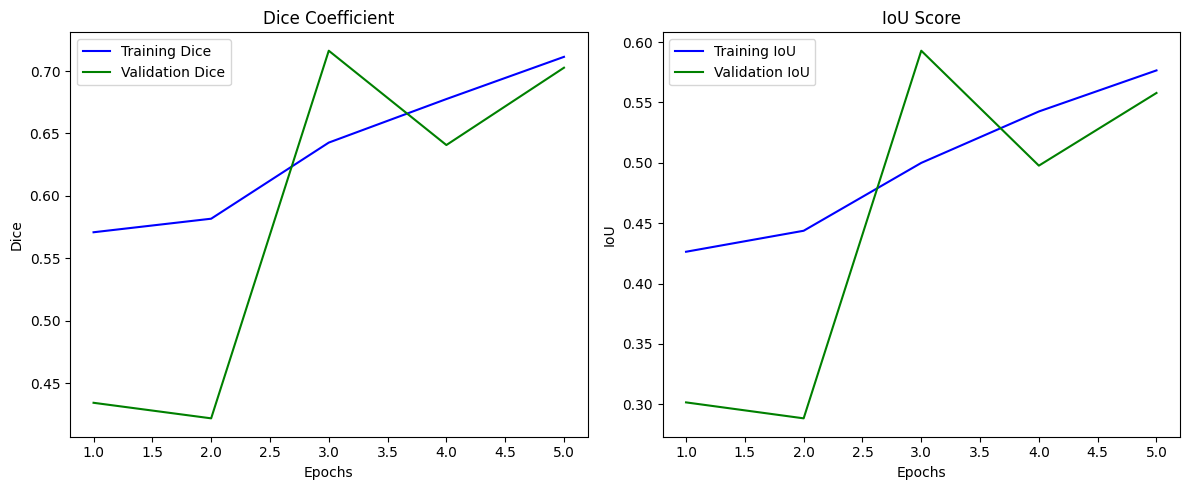

In [ ]:
import matplotlib.pyplot as plt

# Récupérer l'historique
dice = history.history['dice_coeff']
val_dice = history.history['val_dice_coeff']
iou_score = history.history['iou']
val_iou_score = history.history['val_iou']
epochs = range(1, len(dice) + 1)

# Courbe du Dice Coefficient
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, dice, 'b', label='Training Dice')
plt.plot(epochs, val_dice, 'g', label='Validation Dice')
plt.title('Dice Coefficient')
plt.xlabel('Epochs')
plt.ylabel('Dice')
plt.legend()

# Courbe du IoU
plt.subplot(1, 2, 2)
plt.plot(epochs, iou_score, 'b', label='Training IoU')
plt.plot(epochs, val_iou_score, 'g', label='Validation IoU')
plt.title('IoU Score')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()

plt.tight_layout()
plt.show()

####**User Interface and Deployement**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyngrok
import gradio as gr
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from pyngrok import ngrok
import traceback


# Ferme les anciens tunnels si existants
ngrok.kill()
ngrok.set_auth_token("2xtnFnj3yKJwDZKttUNuTK5MOY9_88SPjCYZF9syuzLoFRWqm")

# Chargement des modèles
classifier = load_model('/content/drive/MyDrive/models/classifier_model.h5')
unet_model = load_model('/content/drive/MyDrive/models/unet_model.h5')

# Fonction de prédiction
def predict(image_input):
    try:
        # Gestion des canaux
        if len(image_input.shape) == 2:
            image_input = cv2.cvtColor(image_input, cv2.COLOR_GRAY2RGB)
        elif image_input.shape[-1] == 4:
            image_input = cv2.cvtColor(image_input, cv2.COLOR_RGBA2RGB)

        # Resize + normalize
        img_resized = cv2.resize(image_input, (224, 224)) / 255.0
        img_batch = np.expand_dims(img_resized, axis=0)

        # Classification
        pred = classifier.predict(img_batch)[0]
        class_label = np.argmax(pred)

        if class_label == 0:
            return "No tumor detected", image_input  # Retourner l'image originale
        else:
            # Segmentation
            seg_mask = unet_model.predict(img_batch)[0]
            seg_mask = (seg_mask > 0.5).astype(np.uint8) * 255
            seg_mask = cv2.resize(seg_mask, (image_input.shape[1], image_input.shape[0]))  # remettre à taille originale

            if len(seg_mask.shape) == 2:
                seg_mask = cv2.cvtColor(seg_mask, cv2.COLOR_GRAY2BGR)

            # Superposer le masque en rouge
            overlay = image_input.copy()
            overlay[seg_mask[:, :, 0] > 0] = [255, 0, 0]  # couleur rouge pour la tumeur

            blended = cv2.addWeighted(image_input, 0.7, overlay, 0.3, 0)

            return "Tumor detected", blended  # retourne l’image annotée

    except Exception as e:
        error_message = traceback.format_exc()
        print(error_message)
        return f"Error:\n{error_message}", None




# Interface avec bouton explicite
with gr.Blocks() as demo:
    gr.Markdown("# Brain Tumor Detection")
    gr.Markdown("Upload the MRI and click  **Predict**.")

    with gr.Row():
        image_input = gr.Image(type="numpy", label="Cerebral MRI")
        output_text = gr.Text(label="Result")
        output_image = gr.Image(label="Segmentation")

    predict_button = gr.Button("Predict")
    predict_button.click(fn=predict, inputs=image_input, outputs=[output_text, output_image])

# Ouvre le tunnel
public_url = ngrok.connect(7861)
print("🔗 Lien public :", public_url)

# Lance l’interface
demo.launch(server_name="0.0.0.0", server_port=7861, share=False)


🔗 Lien public : NgrokTunnel: "https://995f-34-125-104-63.ngrok-free.app" -> "http://localhost:7861"
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>